In [121]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib notebook
from pydub import AudioSegment
# from pydub.playback import play
import warnings
warnings.filterwarnings('ignore')

In [148]:
class AudioFP():
    ## Initializing AudioFP object properties
    def __init__(self, filename):
        self.songname = filename
        self.channels = []
        self.songdata = []
        self.framerate = []
        
    ## Reading audio file using pydub
    def read_audiofile(self):
        audiofile = AudioSegment.from_file(self.songname)
        self.songdata = np.frombuffer(audiofile._data, np.int16)
        for chn in range(audiofile.channels):
            self.channels.append(self.songdata[chn::audiofile.channels])
        self.framerate = audiofile.frame_rate
        
    ## Generate and plot spectrogram of audio data
    def generate_spectogram(self):
        x = self.channels[0]
        fs = self.framerate
        window = 'hamming'
        nperseg = 4096
        overlap_ratio = 0.5
        noverlap = int(overlap_ratio * nperseg)
        f, t, sgram = signal.spectrogram(x, fs, window)
        sgram = 10 * np.log10(sgram)  # apply log transform since specgram() returns linear array
        sgram[sgram == -np.inf] = 0  # replace infs with zeros
        plt.pcolormesh(t, f, sgram, cmap='jet')
        plt.ylabel('Frequency (Hz)')
        plt.xlabel('Time (s)')
        plt.show()

In [149]:
song1 = AudioFP("Choc--Eigenvalue-Subspace-Decomposition.mp3")
song1.read_audiofile()

In [150]:
# plt.plot(song1.channels[0])
# plt.plot(song1.channels[1])

<IPython.core.display.Javascript object>


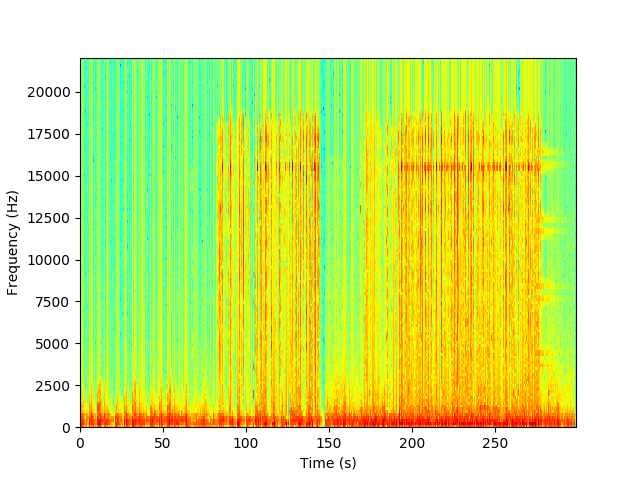

In [151]:
song1.generate_spectogram()